# FFT radix-2 and Bluestein's Algorithm
## Overview
In this project, I've implemented a fast Fourier transform for arbitrary $n$. This algorithm is known as Bluestein’s algorithm.  
Recall that for a sequence of numbers $a_{0},...,a_{n-1}$, where $a_{i}\in\mathbb{C}$, the forward discrete Fourier transform (DFT) is defined as
$$
A_{k}=\sum_{j=0}^{n-1}a_{j}e^{2\pi ij\frac{k}{n}},\ k=0,...,n-1
$$
and the inverse discrete Fourier transform (IDFT) is defined as
$$
a_{k}=\frac{1}{n}\sum_{j=0}^{n-1}A_{k}e^{-2\pi ij\frac{k}{n}},\ j=0,...,n-1
$$
First, let's talk about radix-2 algorithm. Assume that $n$ is power of $2$ , it means $n=2^{s}$ for some non-negative integer $s$.  
Observe that that
$$
A_{k}	=\sum_{j=0}^{n-1}a_{j}e^{2\pi ijk/n}=\sum_{j=0}^{n/2-1}a_{2j}e^{2\pi ik\left(2j\right)/n}+\sum_{j=0}^{n/2-1}a_{j}e^{2\pi ik\left(2j+1\right)/n}
	=\sum_{j=0}^{n/2-1}a_{2j}e^{2\pi ikj/\left(n/2\right)}+\sum_{j=0}^{n/2-1}a_{j}e^{2\pi ikj/\left(n/2\right)}e^{2\pi ik/n}=A_{k}^{e}+A_{k}^{o}e^{2\pi ik/n}
$$
where $A_{k}^{e}$ is the DFT of the even subsequence of $a_{j}$ and $A_{k}^{o}$ is the DFT of the odd subsequence of $a_{j}$ . Thus, to compute a DFT of length $n$, we compute two DFTs of length $n/2$ and combine them using that. Now, we can repeat the process for $A_{k}^{e}$ and $A_{k}^{o}$. For a sequence of length $n$ we need $\log_{2}n$ recursions, where at each level we do a total of $O(n)$ operations. Thus, the total complexity of the FFT is $O(n\log n)$ operations.  
That can be implemented very easly using recurrence, but it now very efficient. So we will implement it without recurrence. To do that, note that we can apply the even-odd decomposition of that until get a sequence of length one. The discrete Fourier transform of length one is just copying the one number from the input to the output. In other words, for every pattern of $\log_{2}n$ $e$’s and $o$’s, there is a one-point transform that is just one of the input numbers $a_{j}$ , that is
$$
A_{k}^{eoeeooee...e},\ for\ some\ j.
$$
To find which index $j$ corresponds to a given sequence of $e$’s and $o$’s, reverse the pattern of $e$’s and $o$’s, then let $e=0$ and $o=1$, and you will have, in binary, the value of $j$. The reason is that successive subdivisions of the data into even and odd are tests of successive low-order (least significant) bits of $j$. This method is called bit reversal. This idea of bit reversal together with allows for an efficient implementation of the FFT. Take the original vector of data $a_{j}$ rearrange it into bit-reversed order, so that at the $j$ entry of the array we put the number whose index is obtained from bit reversing $j$. The points as given are the one-point transforms. We combine adjacent pairs using it to get two-point transforms, then combine adjacent pairs of pairs using it to get four-point transforms, and so on, until the first and second halves of the whole data set are combined into the final transform. Each combination takes of order n operations, and there are $\log_{2}n$ combinations, so the whole algorithm is $O(n\log n)$. For more details, you can look for the explanation of bit reversal in the book *William H. Press, Saul A. Teukolsky, William T. Vetterling, and Brian P. Flannery. 2007. Numerical Recipes 3rd Edition: The Art of Scientific Computing (3rd. ed.). Cambridge University Press, USA.*  
As we can see, thats works only when $n$ is power of $2$. If isn't, we can use the Blustein's Algorithm, that using the radix-2.  
When you're using the identity $jk=-\frac{\left(k-j\right)^{2}}{2}+\frac{j^{2}}{2}+\frac{k^{2}}{2}$ it results
$$
A_{k}=e^{-\pi ik^{2}/n}\sum_{j=0}^{n-1}\left(a_{j}e^{-\pi ij^{2}/n}\right)e^{\pi i\left(k-j\right)^{2}/n},\ k=0,...,n-1
$$
If we write $x_{j}=a_{j}e^{-\pi ij^{2}/n},y_{j}=e^{\pi ij^{2}/n}$ then
$$
A_{k}=y_{k}^{*}\left(\sum_{j=0}^{n-1}x_{j}y_{k-j}\right),\ k=0,...,n-1
$$
which is the convolution between the sequences $x_{j}$ and $y_{j}$ , multiplied by the factors $y_{k}^{*}$.  
To compute the above convolution, we need to zero-pad to a length $m\geq2n–1$. This means that $x_{j}$ is extended to an array $\tilde{x_{j}}$ of length $m$, where $\tilde{x_{j}}=x_{j}$ for $0\leq j<n$ and $\tilde{x_{j}}=0$ otherwise. However, because of the $y_{k-j}$ term in the convolution, both positive and negative values of $j$ are required for $y_{j}$ (noting that $y_{-j}=y_{j}$ ). The periodic boundaries implied by the DFT of the zero-padded array mean that $-j$ is equivalent to $m-j$. Thus, $y_{j}$ is extended to an array $\tilde{y_{j}}$ of length $m$, where $\tilde{y_{0}}=y_{0}$, $y_{j}=\tilde{y_{m-j}}$ for $0<j<n$, and $\tilde{y_{j}}=0$ otherwise. $\tilde{x_{j}}$ and $\tilde{y_{j}}$ are then FFTed, multiplied pointwise, and inverse FFTed to obtain the convolution of $x_{j}$ and $y_{j}$, according to the usual convolution theorem.  
This project is part of Workshop in Scientific Computing @ TAU by Yoel Shkolnisky & Nir Sochen.  
Reference: Bluestein, L. “A linear filtering approach to the computation of discrete Fourier
transform”. IEEE Transactions on Audio and Electroacoustics. 18 (4): 451–455.

## Code
First we'll implement the DFT calculation.  
*Imports*


In [4]:
import numpy as np

*straight forward implementation of DFT*

In [5]:
def dft(vec, inverse = False):
    N = len(vec)
    y = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        for j in range(N):
            e = 2j * np.pi * j * k / N
            e = -e if inverse else e
            y[k] += vec[j] * np.exp(e)
        if inverse:
            y[k] /= N
    return y

*radix-2 for $n=2^{s}$ number*

In [6]:
def reverse_bits(val, width):
    result = 0
    for _ in range(width):
        result = (result << 1) | (val & 1)
        val >>= 1
    return result


def bit_reversal(vec):
    vec_length = len(vec)
    levels = vec_length.bit_length() - 1
    result = np.zeros(vec_length, dtype=np.complex128)
    for i in range(vec_length):
        result[i] = vec[reverse_bits(i, levels)]
    return result


def twiddle(size, until, inverse):
    coef = (-2 if inverse else 2) * 1j * np.pi
    return [np.exp(coef * k / size) for k in range(until)]


def butterfly(vec_even, vec_odd, twiddles):
    vec_length = len(vec_even) * 2
    result = np.zeros(vec_length, dtype=np.complex128)
    for k in range(vec_length // 2):
        result[k] = vec_even[k] + vec_odd[k] * twiddles[k]
        result[k + vec_length // 2] = vec_even[k] - vec_odd[k] * twiddles[k]
    return result


def radix2(vec, inverse = False):
    vec_length = len(vec)
    vec = bit_reversal(vec)
    stages = vec_length.bit_length() - 1
    for stage in range(1, stages + 1):
        size = 2 ** stage
        for i in range(0, vec_length, size):
            half_size = size // 2
            l_vec = vec[i: i + half_size]
            r_vec = vec[i + half_size: i + size]
            twd_fac = twiddle(size, size // 2, inverse)
            result = butterfly(l_vec, r_vec, twd_fac)
            vec[i: i + size] = result
    if inverse:
        return vec/vec_length 
    return vec

*Bluestein's algorithm implementation*

In [7]:
def fft(vec, inverse = False):
    vec_length = len(vec)
    padding = 2 ** ((vec_length * 2).bit_length())
    sign = (-1 if inverse else 1)
    coef_arr = 1j * np.pi * (np.arange(vec_length) ** 2) / vec_length
    twd_f, twd_b = np.exp(-sign * coef_arr), np.exp(sign * coef_arr)
    x_pad, y_pad = np.zeros(padding, dtype=np.complex128), np.zeros(padding, dtype=np.complex128)
    x_pad[: vec_length] = vec * twd_b
    y_pad[: vec_length] = twd_f
    y_pad[padding - vec_length + 1:] = twd_f[: 0: -1]
    result = conv(x_pad, y_pad)[: vec_length] * twd_b
    if inverse:
        return result/vec_length
    return result


def conv(x_vec, y_vec):
    fft_x = radix2(x_vec)
    fft_y = radix2(y_vec)
    fft_x *= fft_y
    fft_x = radix2(fft_x, inverse=True)
    return fft_x

## Comparing DFT Vs. FFT Bluestein's algorithm

In [14]:
import time
import matplotlib.pyplot as plt

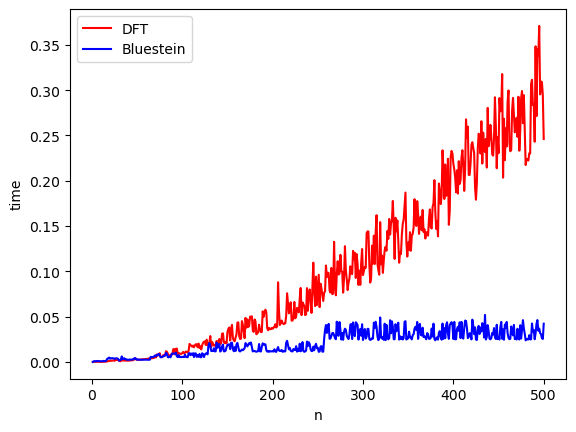

In [15]:
samples = 500
result = np.zeros((2, samples))
for i in range(1, samples):
    
    x_sample = np.random.uniform(-1 * i, i, i) + \
        1.j * np.random.uniform(-1 * i, i, i)
        
    start_time = time.time()
    dft(x_sample)
    result[0, i] = time.time() - start_time
    
    start_time = time.time()
    fft(x_sample)
    result[1, i] = time.time() - start_time
    
x_linspace = np.linspace(1, samples, samples)
plt.plot(x_linspace, result[0, :], 'r-', label='DFT')
plt.plot(x_linspace, result[1, :], 'b-', label='Bluestein')
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.show()

# Conclusion
As we can see, Bluestein's algorithm significantly accelerates the computation of Fast Fourier Transform (FFT) coefficients, particularly for non-power-of-two lengths. This optimization has had a profound impact on various industries, facilitating advancements in numerous innovative technologies. For example, in telecommunications, Bluestein's algorithm enables faster signal processing, leading to improved data transmission rates and better quality of service. In the field of medical imaging, it enhances the efficiency of techniques like MRI and CT scans, allowing for quicker and more accurate diagnostics. Additionally, in audio and video compression, the algorithm helps achieve higher compression rates without sacrificing quality, making streaming services more efficient and cost-effective. Overall, Bluestein's algorithm has played a crucial role in driving technological progress across a wide range of applications, demonstrating its versatility and importance in modern computing.